In [ ]:
!curl -LsSf https://astral.sh/uv/install.sh | sh


downloading uv 0.9.18 x86_64-unknown-linux-gnu
no checksums to verify
installing to /usr/local/bin
  uv
  uvx
everything's installed!


In [ ]:
# !git clone https://github.com/WhoKnowsssss/RL-Training-MiniProject.git && mv RL-Training-MiniProject/ mjlab/
!git clone https://github.com/larryhui7/ME193B-Quadruped-Mini-Project.git && mv ME193B-Quadruped-Mini-Project/ mjlab/

Cloning into 'ME193B-Quadruped-Mini-Project'...
remote: Enumerating objects: 821, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 821 (delta 96), reused 84 (delta 50), pack-reused 685 (from 1)
Receiving objects: 100% (821/821), 19.15 MiB | 13.64 MiB/s, done.
Resolving deltas: 100% (353/353), done.


In [ ]:
!cd mjlab/ && git checkout main

Already on 'main'
Your branch is up to date with 'origin/main'.


Training on CoLab

In [ ]:
!cd mjlab && MUJOCO_GL=egl uv run train Mjlab-Velocity-Flat-Unitree-Go1 --env.scene.num-envs 4096

Streaming output truncated to the last 5000 lines.
                                    ETA: 00:02:19

################################################################################
                          Learning iteration 853/1000                            

                            Total steps: 83951616 
                       Steps per second: 102101 
                        Collection time: 0.844s 
                          Learning time: 0.118s 
                        Mean value loss: 0.0055
                    Mean surrogate loss: -0.0009
                      Mean entropy loss: -8.7543
                            Mean reward: 78.61
                    Mean episode length: 1000.00
                  Mean action noise std: 0.13
   Episode_Reward/track_linear_velocity: 1.8760
  Episode_Reward/track_angular_velocity: 1.5981
                 Episode_Reward/upright: 0.9929
       Episode_Reward/default_joint_pos: -0.2494
             Episode_Reward/action_rate: -0.1125
      

In [ ]:
!zip -r velmodel.zip /content/mjlab/logs/rsl_rl/go1_velocity/2025-12-20_06-11-58

	zip warning: name not matched: /content/mjlab/logs/rsl_rl/go1_velocity/2025-12-20_06-11-58

zip error: Nothing to do! (try: zip -r velmodel.zip . -i /content/mjlab/logs/rsl_rl/go1_velocity/2025-12-20_06-11-58)


Visualization on Colab

In [ ]:
import os

search_path = '/content/mjlab/logs/rsl_rl/go1_velocity'
print(f"Searching for checkpoints in: {search_path}")

for root, dirs, files in os.walk(search_path):
    for file in files:
        if file.endswith(".pt"):
            print(os.path.join(root, file))

Searching for checkpoints in: /content/mjlab/logs/rsl_rl/go1_velocity
/content/mjlab/logs/rsl_rl/go1_velocity/model_750.pt
/content/mjlab/logs/rsl_rl/go1_velocity/model_500.pt
/content/mjlab/logs/rsl_rl/go1_velocity/model_850.pt
/content/mjlab/logs/rsl_rl/go1_velocity/model_150.pt
/content/mjlab/logs/rsl_rl/go1_velocity/model_50.pt
/content/mjlab/logs/rsl_rl/go1_velocity/model_250.pt
/content/mjlab/logs/rsl_rl/go1_velocity/model_999.pt
/content/mjlab/logs/rsl_rl/go1_velocity/model_700.pt
/content/mjlab/logs/rsl_rl/go1_velocity/model_600.pt
/content/mjlab/logs/rsl_rl/go1_velocity/model_400.pt
/content/mjlab/logs/rsl_rl/go1_velocity/model_650.pt
/content/mjlab/logs/rsl_rl/go1_velocity/model_950.pt
/content/mjlab/logs/rsl_rl/go1_velocity/model_450.pt
/content/mjlab/logs/rsl_rl/go1_velocity/model_900.pt
/content/mjlab/logs/rsl_rl/go1_velocity/model_550.pt
/content/mjlab/logs/rsl_rl/go1_velocity/model_300.pt
/content/mjlab/logs/rsl_rl/go1_velocity/model_200.pt
/content/mjlab/logs/rsl_rl/go1

In [ ]:

from google.colab import output

output.serve_kernel_port_as_iframe(8081)

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Found 30 experiment directories.
Checking file: /content/mjlab/logs/rsl_rl/go1_velocity/2025-12-20_07-44-44/events.out.tfevents.1766216689.70ed80ddea9f.18906.0 (Size: 647.32 KB)
-> Found valid data! 28 scalar tags available.
Plotting data from: /content/mjlab/logs/rsl_rl/go1_velocity/2025-12-20_07-44-44/events.out.tfevents.1766216689.70ed80ddea9f.18906.0


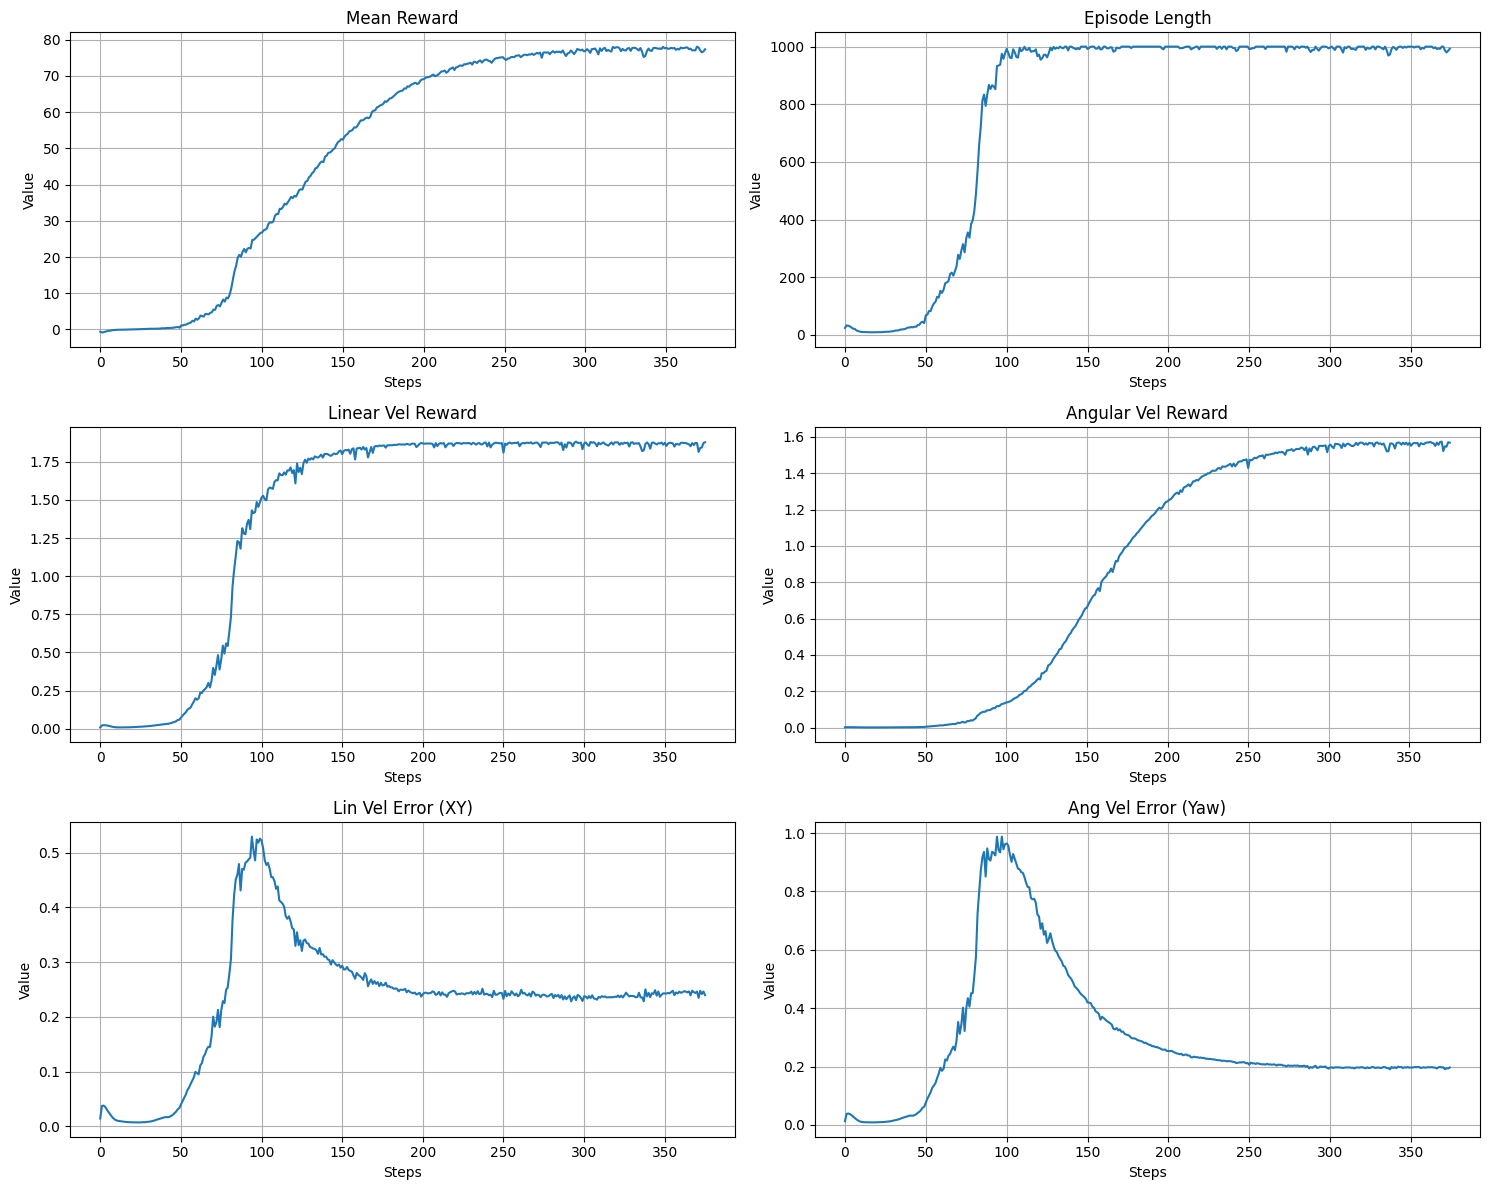

In [ ]:
import os
import glob
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

def plot_all_curves(log_base_dir):
    # Find all experiment directories
    exp_dirs = glob.glob(os.path.join(log_base_dir, "*"))
    if not exp_dirs:
        print(f"No log directories found in {log_base_dir}")
        return

    print(f"Found {len(exp_dirs)} experiment directories.")

    # Find all event files across all directories
    all_event_files = []
    for d in exp_dirs:
        files = glob.glob(os.path.join(d, "events.out.tfevents.*"))
        all_event_files.extend(files)

    # Sort files by modification time, newest first
    all_event_files.sort(key=os.path.getmtime, reverse=True)

    valid_ea = None
    valid_file = None

    # Iterate through files to find one with actual scalar data
    for ef in all_event_files:
        file_size = os.path.getsize(ef)
        print(f"Checking file: {ef} (Size: {file_size/1024:.2f} KB)")

        if file_size < 1024: # Skip very small files (likely empty headers)
            continue

        try:
            # Load all scalars using the string key 'scalars'
            ea = EventAccumulator(ef, size_guidance={'scalars': 0})
            ea.Reload()
            tags = ea.Tags()['scalars']
            if len(tags) > 0:
                print(f"-> Found valid data! {len(tags)} scalar tags available.")
                valid_ea = ea
                valid_file = ef
                break
        except Exception as e:
            print(f"-> Error reading file: {e}")
            continue

    if valid_ea is None:
        print("No event file with valid scalar data found in any directory.")
        return

    print(f"Plotting data from: {valid_file}")

    # Define all tags to plot
    tags_to_plot = {
        'Mean Reward': 'Train/mean_reward',
        'Episode Length': 'Train/mean_episode_length',
        'Linear Vel Reward': 'Episode_Reward/track_linear_velocity',
        'Angular Vel Reward': 'Episode_Reward/track_angular_velocity',
        'Lin Vel Error (XY)': 'Metrics/twist/error_vel_xy',
        'Ang Vel Error (Yaw)': 'Metrics/twist/error_vel_yaw'
    }

    # Create a 3x2 grid for the plots
    fig, axes = plt.subplots(3, 2, figsize=(15, 12))
    axes = axes.flatten()

    available_tags = valid_ea.Tags()['scalars']

    for ax, (title, tag) in zip(axes, tags_to_plot.items()):
        if tag in available_tags:
            events = valid_ea.Scalars(tag)
            steps = [e.step for e in events]
            values = [e.value for e in events]

            ax.plot(steps, values)
            ax.set_title(title)
            ax.set_xlabel('Steps')
            ax.set_ylabel('Value')
            ax.grid(True)
        else:
            ax.text(0.5, 0.5, f'Tag {tag} not found', ha='center')
            ax.set_title(title)
            print(f"Warning: Tag '{tag}' not found in this log file.")

    plt.tight_layout()
    plt.show()

# Run the plotter
log_base_path = "/content/mjlab/logs/rsl_rl/go1_velocity"
if os.path.exists(log_base_path):
    plot_all_curves(log_base_path)
else:
    print(f"Log path {log_base_path} does not exist yet. Please run training first.")

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Define path (handling potential relative path differences)
candidates = [
    "mjlab/mjlab/tracking_data.npz",
    "mjlab/tracking_data.npz"
]

data_path = None
for p in candidates:
    if os.path.exists(p):
        data_path = p
        break

if data_path is None:
    print(f"Error: Could not find tracking_data.npz in {candidates}")
else:
    print(f"Loading data from {data_path}")
    data = np.load(data_path)
    measured = data['measured']
    commanded = data['commanded']
    time_steps = data['time_steps']

    # Define phases based on the new sequence
    phases = {
        "Phase 1: Forward Ramp": (0, 125),
        "Phase 2: Lateral Move": (125, 250),
        "Phase 3: Turn": (250, 375),
        "Phase 4: Mixed": (375, 500)
    }

    print("\nFinal Performance Metrics (RMSE):")
    print("-" * 70)
    print(f"{ 'Phase':<25} | { 'Vx RMSE':<12} | { 'Vy RMSE':<12} | { 'Wz RMSE':<12}")
    print("-" * 70)

    for phase_name, (start, end) in phases.items():
        # Slice data for the phase
        valid_indices = (time_steps >= start) & (time_steps < end)

        if np.sum(valid_indices) == 0:
            print(f"{phase_name:<25} | {'N/A':<12} | {'N/A':<12} | {'N/A':<12}")
            continue

        m_phase = measured[valid_indices]
        c_phase = commanded[valid_indices]

        # Calculate RMSE for each component
        # 0: vx, 1: vy, 2: wz
        rmse_vx = np.sqrt(np.mean((m_phase[:, 0] - c_phase[:, 0])**2))
        rmse_vy = np.sqrt(np.mean((m_phase[:, 1] - c_phase[:, 1])**2))
        rmse_wz = np.sqrt(np.mean((m_phase[:, 2] - c_phase[:, 2])**2))

        print(f"{phase_name:<25} | {rmse_vx:<12.4f} | {rmse_vy:<12.4f} | {rmse_wz:<12.4f}")
    print("-" * 70)

    # Generate Plots
    fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

    # Velocity X
    axes[0].plot(time_steps, commanded[:, 0], 'r--', label=r'Commanded $v_x$', linewidth=2)
    axes[0].plot(time_steps, measured[:, 0], 'b-', label=r'Measured $v_x$', alpha=0.7)
    axes[0].set_ylabel('Velocity (m/s)')
    axes[0].set_title(r'Forward Velocity Tracking ($v_x$)')
    axes[0].legend(loc='upper left')
    axes[0].grid(True)

    # Velocity Y
    axes[1].plot(time_steps, commanded[:, 1], 'r--', label=r'Commanded $v_y$', linewidth=2)
    axes[1].plot(time_steps, measured[:, 1], 'b-', label=r'Measured $v_y$', alpha=0.7)
    axes[1].set_ylabel('Velocity (m/s)')
    axes[1].set_title(r'Lateral Velocity Tracking ($v_y$)')
    axes[1].legend(loc='upper left')
    axes[1].grid(True)

    # Angular Velocity Z
    axes[2].plot(time_steps, commanded[:, 2], 'r--', label=r'Commanded $\omega_z$', linewidth=2)
    axes[2].plot(time_steps, measured[:, 2], 'b-', label=r'Measured $\omega_z$', alpha=0.7)
    axes[2].set_ylabel('Velocity (rad/s)')
    axes[2].set_xlabel('Time Steps')
    axes[2].set_title(r'Yaw Velocity Tracking ($\omega_z$)')
    axes[2].legend(loc='upper left')
    axes[2].grid(True)

    plt.tight_layout()
    plt.show()

Error: Could not find tracking_data.npz in ['mjlab/mjlab/tracking_data.npz', 'mjlab/tracking_data.npz']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Define path (handling potential relative path differences)
candidates = [
    "mjlab/mjlab/tracking_data.npz",
    "mjlab/tracking_data.npz"
]

data_path = None
for p in candidates:
    if os.path.exists(p):
        data_path = p
        break

if data_path is None:
    print(f"Error: Could not find tracking_data.npz in {candidates}")
else:
    print(f"Loading data from {data_path}")
    data = np.load(data_path)
    time_steps = data['time_steps']
    fl_foot_positions = data['fl_foot_positions']

    # Plotting the FL foot trajectory
    plt.figure(figsize=(10, 6))
    # Corrected indexing: fl_foot_positions[:, 0, 0] for X, etc.
    plt.plot(time_steps, fl_foot_positions[:, 0, 0], label='FL Foot X Position')
    plt.plot(time_steps, fl_foot_positions[:, 0, 1], label='FL Foot Y Position')
    plt.plot(time_steps, fl_foot_positions[:, 0, 2], label='FL Foot Z Position')
    plt.xlabel('Time Steps')
    plt.ylabel('Position (m)')
    plt.title('Front-Left Foot Position Trajectory')
    plt.legend()
    plt.grid(True)
    plt.show()
